In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# import re
# from sklearn.model_selection import train_test_split
# from nltk.corpus  import stopwords
# from nltk.stem import WordNetLemmatizer


In [3]:
import pandas as pd
import numpy as np
# import pandas_profiling
import re
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud  import WordCloud
# from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# from PIL import Image
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('data/trainset.csv')
data.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [5]:
data.shape

(4382, 2)

#### 2. Feature Engineering

In [6]:
def cleaning(df1):
    lowered=df1.lower() # lowering the sentences 
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces to lemmatize
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords
    df1=' '.join(df1) # joining back the words of list
    return(removed)

In [7]:
data['Sentence'] = data['Sentence'].apply(cleaning)
data.head()

,Sentence,Sentiment
0,according to the finnish russian chamber of co...,neutral
1,the swedish buyout firm has sold its remaining...,neutral
2,spy wouldn t be surprised to see a green close,positive
3,shell s billion bg deal meets shareholder ...,negative
4,ssh communications security corp stock exchang...,negative


In [8]:
data['Sentence'].values

array(['according to the finnish russian chamber of commerce   all the major construction companies of finland are operating in russia  ',
       'the swedish buyout firm has sold its remaining      percent stake   almost eighteen months after taking the company public in finland  ',
       ' spy wouldn t be surprised to see a green close', ...,
       'rising costs have forced packaging producer huhtamaki to axe    jobs at its hampshire manufacturing plant  ',
       'in the building and home improvement trade   sales decreased by        to eur       mn  ',
       'helsinki afx   kci konecranes said it has won an order for four hot metal ladle cranes from indian steel producer bhushan steel and strips ltd   '],
      dtype=object)

**Word Cloud**

In [9]:
corpus=' '.join(data['Sentence'])

In [10]:
word_cloud=WordCloud().generate(corpus)
word_cloud

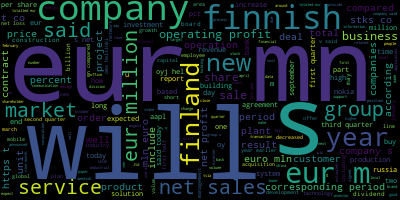

In [11]:
img = word_cloud.to_image()
img

In [12]:
# for tfidf vectorizer
tfidf=TfidfVectorizer()
transformed_data=tfidf.fit_transform(data['Sentence'])
data_dtm = pd.DataFrame(transformed_data.toarray(), columns=tfidf.get_feature_names())
data_dtm.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_dtm.shape

(4382, 8920)

In [14]:
data.shape

(4382, 2)

In [15]:
data.index

RangeIndex(start=0, stop=4382, step=1)

In [16]:
data_dtm['Sentiment'] = data['Sentiment']
data_dtm

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


In [17]:
# # Convert a collection of raw documents to a matrix of TF-IDF features.
# # TODO : try different hyperparameters for the function below
# tfidf = TfidfVectorizer(strip_accents="ascii", lowercase=True,ngram_range=(1,1),max_features=1000)
# tfTrain = tfidf.fit_transform(X_train) 
# tfTest = tfidf.transform(X_test)

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(data["Sentence"].values, data["Sentiment"].values, shuffle=True,test_size=0.1)

In [19]:
# some of the words
tfidf.get_feature_names()[:10]

['aaland',
 'aaltonen',
 'aapl',
 'aaron',
 'aava',
 'aazhang',
 'ab',
 'abb',
 'abbv',
 'abc']

In [20]:
le = LabelEncoder()
data_dtm['Sentiment']=le.fit_transform(data_dtm['Sentiment'])
data_dtm.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'negative': 0, 'neutral': 1, 'positive': 2}

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(
#     data["Sentence"].values, data["Sentiment"].values, shuffle=True,test_size=0.1
#     )

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_dtm.drop('Sentiment',axis=1),data_dtm['Sentiment'],test_size=0.1,stratify=data_dtm['Sentiment'])

In [24]:
X_train.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test.head()

,aaland,aaltonen,aapl,aaron,aava,aazhang,ab,abb,abbv,abc,...,zone,zoo,zp,zs,zsl,zte,zurich,zwe,zwhthsvfsf,zy
1925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Model Building

In [26]:
# # Logistic Regressor
# # TODO : Try different hyperparameters for model
# LR = LogisticRegression(max_iter=200).fit(tfTrain, y_train)
# LR

In [27]:
# LRpred = LR.predict(tfTest)

In [28]:
# TODO : Try Other models and report score

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3000)
X_train=pca.fit_transform(X_train)

In [30]:
X_train.shape

(3943, 3000)

In [31]:
X_test=pca.transform(X_test)

In [32]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
y_pred=svc.predict(X_test)

<AxesSubplot:ylabel='count'>

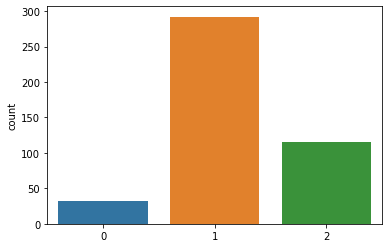

In [34]:
sns.countplot(y_pred)

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 15,  37,  12],
       [ 10, 213,  14],
       [  7,  42,  89]])

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
svc.score(X_test,y_test)

0.7220956719817767

#### 4. Model Testing

In [38]:
from sklearn.metrics import f1_score

In [41]:
# f1score = f1_score(LRpred, y_test, average='weighted')
# acc = np.mean(LRpred==y_test)
# "The accuracy is {0} and the F1 score is {1}".format(acc, f1score)

In [42]:
# f1score = f1_score(LRpred, y_test, average='weighted')
# acc = np.mean(LRpred==y_test)
# "The accuracy is {0} and the F1 score is {1}".format(acc, f1score)

In [43]:
data

,Sentence,Sentiment
0,according to the finnish russian chamber of co...,neutral
1,the swedish buyout firm has sold its remaining...,neutral
2,spy wouldn t be surprised to see a green close,positive
3,shell s billion bg deal meets shareholder ...,negative
4,ssh communications security corp stock exchang...,negative
...,...,...
4377,investments in product development stood at ...,neutral
4378,hsbc says unit to book million charge on ...,negative
4379,rising costs have forced packaging producer hu...,negative
4380,in the building and home improvement trade s...,neutral
